In [1]:
install.packages("metaSurvival")
library(metaSurvival)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
download.file("https://raw.githubusercontent.com/atontini/ICI-RT-NSCLC/main/nsclc-os.txt", "nsclc-os.txt")

In [3]:
dataset<- read.table("nsclc-os.txt",sep="",header = FALSE)

Study<- as.integer(dataset[,2]) 
FirstAuthor<- as.factor(dataset[,3])
Time<- as.double(dataset[,4]) 
Survival<- as.double(dataset[,5]) 
NbRisk<- as.double(dataset[,6])

In [4]:
results<-msurv(Study, Time, NbRisk, Survival, confidence="Greenwood",correctionFlag = T,correctionVal = c(0.25,0.5))
RandomEffectSummary<- results$summary.random

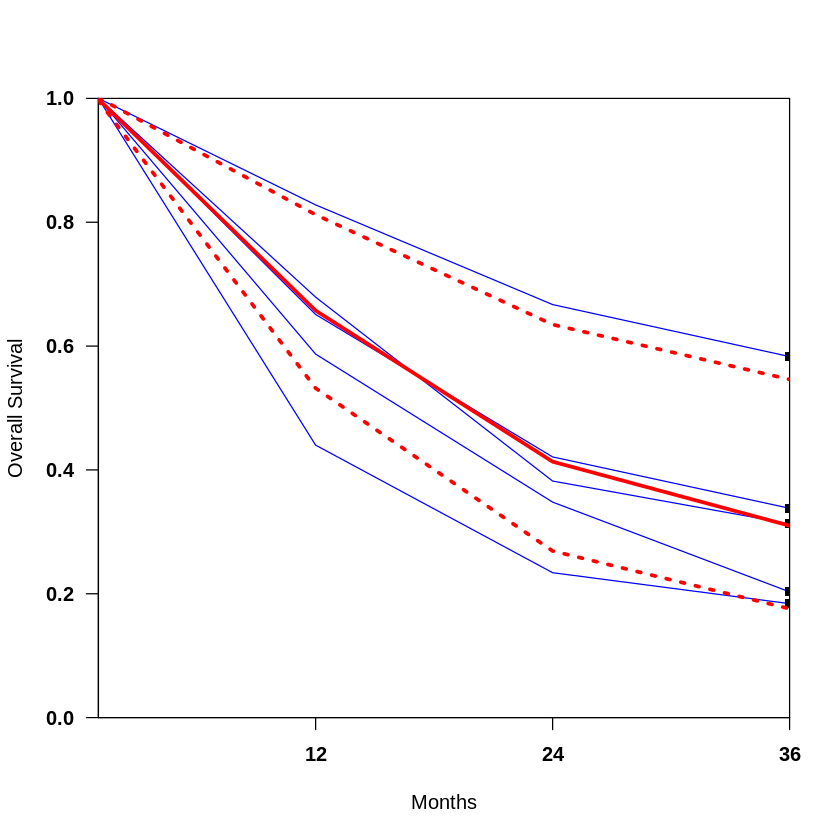

In [5]:
plot(Time, Survival, xaxt="none", yaxt="none", type="n", col="grey", ylim=c(0,1),xlab="Months",ylab="Overall Survival", yaxs="i", xaxs="i")
axis(1, seq(0, 48, 12),las=1, font=2) 
axis(2, seq(0, 1, 0.2),las=2, font=2) 

for (i in unique(sort(Study))){
	lines(Time[Study==i], Survival[Study==i], type="l", col="blue")
	points(max(Time[Study==i]), Survival[Study==i & Time==max(Time[Study==i])], pch=15)
}

lines(RandomEffectSummary[,1], RandomEffectSummary[,2], type="l", col="red", lwd=3)
points(RandomEffectSummary[,1], RandomEffectSummary[,3], type="l", col="red", lty=3, lwd=3)
points(RandomEffectSummary[,1], RandomEffectSummary[,4], type="l", col="red", lty=3, lwd=3)